In [12]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.datasets import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [13]:
data = pd.read_csv(r"C:\Users\HomePC\Desktop\Datasets\Admission_Predict_Ver1.1.csv")

In [14]:
data.shape

(500, 9)

In [15]:
data.drop(columns=['Serial No.'], inplace=True)

In [16]:
data.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
232,312,107,2,2.5,3.5,8.27,0,0.69
22,328,116,5,5.0,5.0,9.50,1,0.94
297,320,120,3,4.0,4.5,9.11,0,0.86
129,333,118,5,5.0,5.0,9.35,1,0.92
48,321,110,3,3.5,5.0,8.85,1,0.82


In [17]:
X = data.iloc[:,:7]

In [18]:
X.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
94,303,99,3,2.0,2.5,7.66,0
35,320,110,5,5.0,5.0,9.20,1
418,309,111,2,2.5,4.0,8.03,0
11,327,111,4,4.0,4.5,9.00,1
75,329,114,2,2.0,4.0,8.56,1


In [19]:
y = data.iloc[:,-1]
y.sample(5)

86     0.72
116    0.56
384    0.96
497    0.93
145    0.81
Name: Chance of Admit , dtype: float64

In [20]:
X.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000


# Without scaling

In [27]:
model = Sequential()
model.add(layers.Dense(10, activation='relu', input_shape= (X.shape[1],)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation= 'relu'))
model.add(layers.Dense(1))

C:\Users\HomePC\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 311 (1.21 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss= 'mse', metrics=['mae'])

In [30]:
history = model.fit(X,y,epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2595.4968 - mae: 50.1316 - val_loss: 572.1030 - val_mae: 23.9073
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 376.6720 - mae: 18.9445 - val_loss: 56.5669 - val_mae: 7.5128
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.8900 - mae: 5.1611 - val_loss: 0.1891 - val_mae: 0.3547
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6869 - mae: 1.0889 - val_loss: 5.2028 - val_mae: 2.2430
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6502 - mae: 2.1145 - val_loss: 1.6176 - val_mae: 1.2118
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0166 - mae: 0.9111 - val_loss: 0.1273 - val_mae: 0.2864
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1354 - mae: 0.2769 - val_loss: 0.2509 - val_mae: 0.4108
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1862 - mae: 0.3382 - val_loss: 0.1569 - val_mae: 0.3189
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

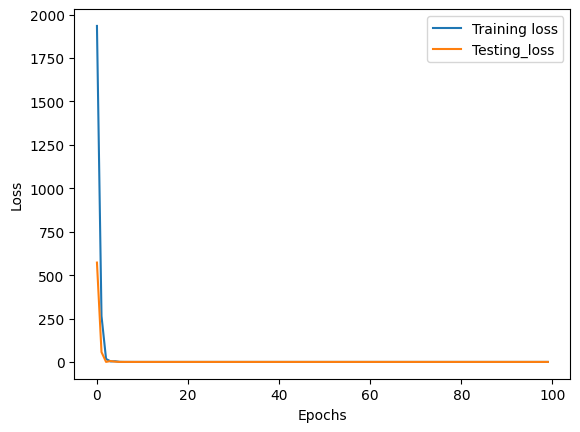

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Testing_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

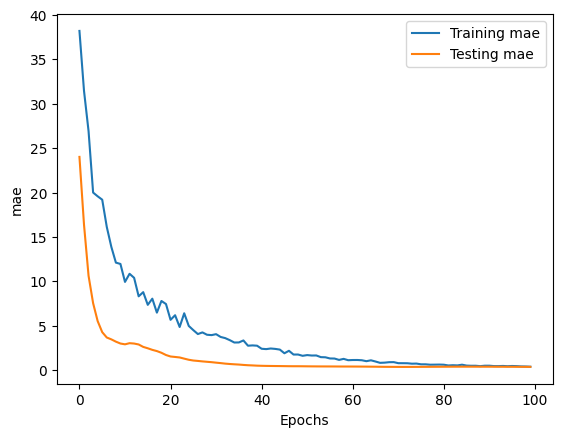

In [26]:
plt.plot(history.history['mae'], label='Training mae')
plt.plot(history.history['val_mae'], label='Testing mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

# With Scaling

In [32]:
model1 = Sequential()
model1.add(layers.Dense(10, activation='relu', input_shape= (X.shape[1],)))
model1.add(layers.Dense(10, activation='relu'))
model1.add(layers.Dense(10, activation= 'relu'))
model1.add(layers.Dense(1))

C:\Users\HomePC\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model1.compile(optimizer='adam', loss= 'mse', metrics=['mae'])

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)

In [35]:
history1 = model1.fit(X_scaled,y,epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3924 - mae: 0.6161 - val_loss: 0.2753 - val_mae: 0.5149
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2625 - mae: 0.5007 - val_loss: 0.1651 - val_mae: 0.3950
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1556 - mae: 0.3819 - val_loss: 0.0616 - val_mae: 0.2337
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mae: 0.2059 - val_loss: 0.0118 - val_mae: 0.0812
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mae: 0.0890 - val_loss: 0.0139 - val_mae: 0.0988
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mae: 0.0918 - val_loss: 0.0107 - val_mae: 0.0839
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mae: 0.0804 - val_loss: 0.0087 - val_mae: 0.0712
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mae: 0.0799 - val_loss: 0.0079 - val_mae: 0.0693
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mae: 0.

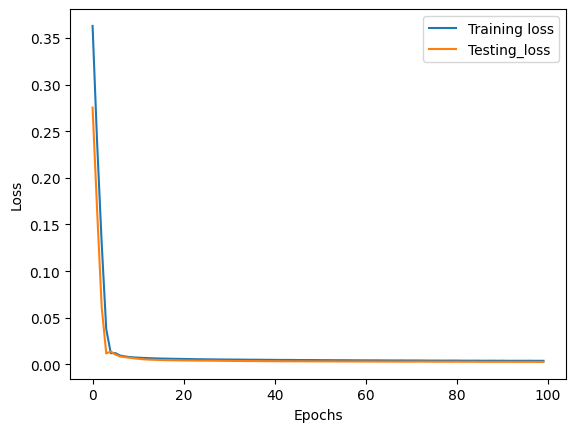

In [36]:
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Testing_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

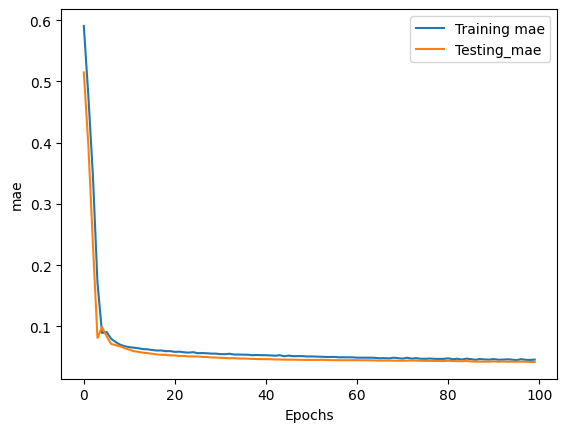

In [37]:
plt.plot(history1.history['mae'], label='Training mae')
plt.plot(history1.history['val_mae'], label='Testing_mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()